# Example of a Camera Display

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
from ctapipe.instrument import SubarrayDescription
from ctapipe.visualization import CameraDisplay
from ctapipe.image import toymodel
from ctapipe.image import hillas_parameters, tailcuts_clean
import numpy as np
import astropy.units as u

Just a quick function to mark a pixel and draw lines to its neighbors

In [3]:
def draw_neighbors(geom, pixel_index, color="r", **kwargs):
    """draw lines between a pixel and its neighbors"""
    neigh = geom.neighbors[pixel_index]  # neighbor indices (not pixel ids)
    x, y = geom.pix_x[pixel_index].value, geom.pix_y[pixel_index].value
    for nn in neigh:
        nx, ny = geom.pix_x[nn].value, geom.pix_y[nn].value
        plt.plot([x, nx], [y, ny], color=color, **kwargs)

Now, let's create a fake Cherenkov image from a given `CameraGeometry` and fill it with some data:

In [4]:
# load an example camera geometry from a simulation file
subarray = SubarrayDescription.read("dataset://gamma_prod5.simtel.zst")
geom = subarray.tel[100].camera.geometry

# create a fake camera image to display:
model = toymodel.Gaussian(
    x=0.2 * u.m,
    y=0.0 * u.m,
    width=0.05 * u.m,
    length=0.15 * u.m,
    psi="35d",
)

image, sig, bg = model.generate_image(geom, intensity=1500, nsb_level_pe=5)

# apply really stupid image cleaning (single threshold):
mask = tailcuts_clean(geom, image, 10, 5)

# calculate image parameters
image[~mask] = 0
hillas = hillas_parameters(geom, image)

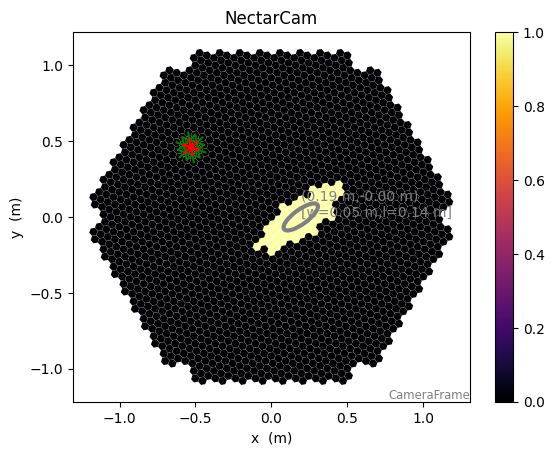

In [5]:
# show the camera image and overlay Hillas ellipse
disp = CameraDisplay(geom)
disp.add_colorbar()
disp.image = image
disp.overlay_moments(hillas, color="grey", linewidth=3, zorder=10)
disp.highlight_pixels(mask, alpha=0.1, color="white")

# draw the neighbors of pixel 430 in red, and the
# neighbor-neighbors in green

for ii in geom.neighbors[430]:
    draw_neighbors(geom, ii, color="green")
draw_neighbors(geom, 430, color="red", lw=2)

For online use, you can use the mpld3 library to automatically convert this to a zoomable HTML5 plot if you like. Simply call `display()` at the end of the code:

    import mpld3
    ...
    mpld3.display()